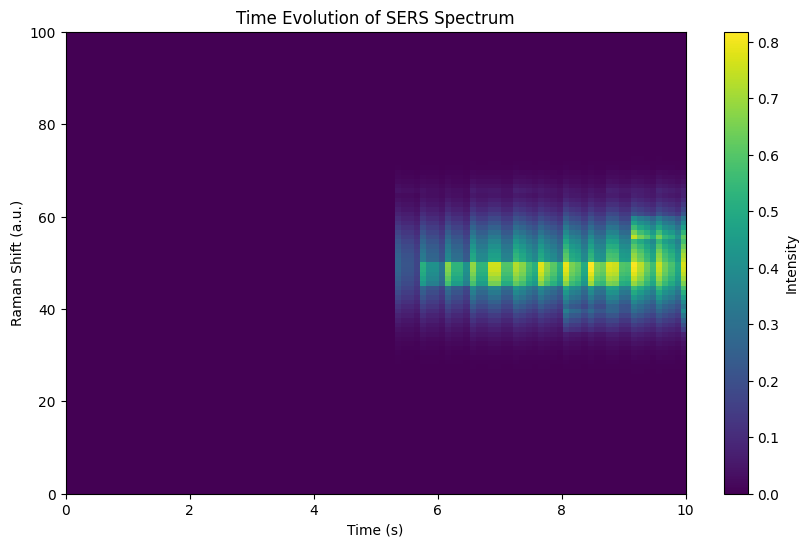

Simulation completed for protein: TTAGCCCTACAGTGAGAGGA


In [7]:
import numpy as np
from scipy.spatial.distance import cdist
import random

import matplotlib.pyplot as plt

# Parameters for two nanoparticles with a pore between them
nanoparticle_radius = 20  # nm
pore_distance = 5  # nm  # Distance between nanoparticles
velocity = 1  # nm/s
timestep = 0.1  # seconds
simulation_time = 10  # seconds
num_timesteps = int(simulation_time / timestep)

# Create a protein chain
chain_length = 20  # Number of residues
residues = ['A', 'C', 'G', 'T']  # Simplified amino acids
protein_chain = [random.choice(residues) for _ in range(chain_length)]
residue_spacing = 0.38  # nm

# Assign Raman intensities to each residue type (simplified spectra)
residue_raman_intensity = {
    'A': 0.9269163800686862,
    'C': 1.23121733207083,
    'G': 0.6025970570602874,
    'T': 1.1252934006879927
}

# Create electromagnetic field hotspot between nanoparticles
# Using a 2D grid to solve for the EM field intensity
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)

# Create hotspot as a combination of two Gaussian distributions for the two nanoparticles
# with highest intensity in the gap between them
x1 = -nanoparticle_radius/2 - pore_distance/2  # Center of first nanoparticle
x2 = nanoparticle_radius/2 + pore_distance/2   # Center of second nanoparticle
hotspot_intensity = (np.exp(-((X - x1) ** 2 + Y ** 2) / 5) + 
                     np.exp(-((X - x2) ** 2 + Y ** 2) / 5) + 
                     3 * np.exp(-((X) ** 2 + Y ** 2) / 0.5))  # Extra intensity in the gap

# Simulate protein movement through the pore
spectra = []
time_points = np.arange(0, simulation_time, timestep)

# Create arrays to store individual residue signals and composite signal
individual_signals = []
composite_spectra = []

for t in range(num_timesteps):
    current_position = velocity * t * timestep
    
    # Initialize spectrum for this timestep
    spectrum = np.zeros(100)  # Use 100 points for spectrum resolution
    
    # Track signals from each residue at this timestep
    residue_signals = []
    
    for i, residue in enumerate(protein_chain):
        # Calculate residue position as it moves through the pore
        residue_x = -nanoparticle_radius - pore_distance/2 + current_position + i * residue_spacing
        residue_y = 0  # Assume protein moves along x-axis
        
        # Find EM field intensity at this position
        if (residue_x >= x_range.min() and residue_x <= x_range.max() and 
            residue_y >= y_range.min() and residue_y <= y_range.max()):
            # Find closest grid point
            x_idx = np.argmin(np.abs(x_range - residue_x))
            y_idx = np.argmin(np.abs(y_range - residue_y))
            
            # Get intensity at this position
            intensity_factor = hotspot_intensity[y_idx, x_idx]
            
            # Generate Raman spectrum for this residue based on its type and the EM intensity
            base_intensity = residue_raman_intensity[residue]
            residue_spectrum = base_intensity * intensity_factor * np.exp(-(np.arange(100) - 50)**2 / 100)
            
            # Add specific peaks based on residue type
            if residue == 'A':
                residue_spectrum[30:35] *= 2.0
            elif residue == 'C':
                residue_spectrum[40:45] *= 2.0
            elif residue == 'G':
                residue_spectrum[50:55] *= 2.0
            elif residue == 'T':
                residue_spectrum[60:65] *= 2.0
                
            # Save individual residue signal
            residue_signals.append(residue_spectrum)
            
            # Add to composite spectrum
            spectrum += residue_spectrum
    
    # Store results
    spectra.append(spectrum)
    individual_signals.append(residue_signals)
    
   

# Final visualization: Time evolution of the entire spectrum
plt.figure(figsize=(10, 6))
plt.imshow(np.array(spectra).T, aspect='auto', 
          extent=[0, simulation_time, 0, 100], cmap='viridis')
plt.colorbar(label='Intensity')
plt.title("Time Evolution of SERS Spectrum")
plt.xlabel("Time (s)")
plt.ylabel("Raman Shift (a.u.)")
plt.show()

# Return data as requested
results = {
    'individual_signals': individual_signals,
    'composite_spectra': spectra,
    'time_points': time_points,
    'protein_chain': protein_chain
}

print(f"Simulation completed for protein: {''.join(protein_chain)}")

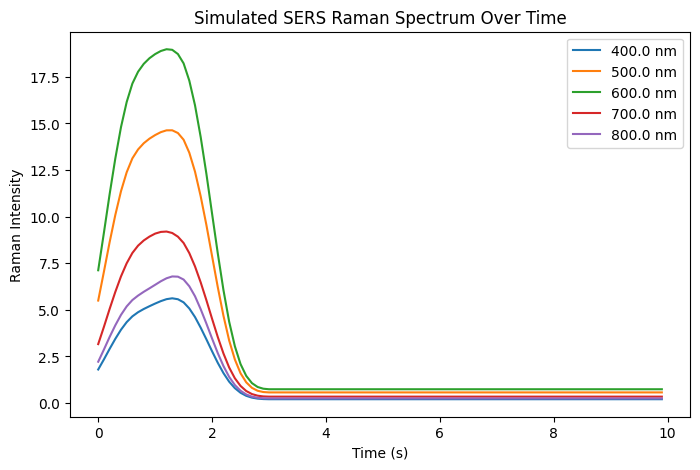

ValueError: x and y must have same first dimension, but have shapes (100,) and (1300,)

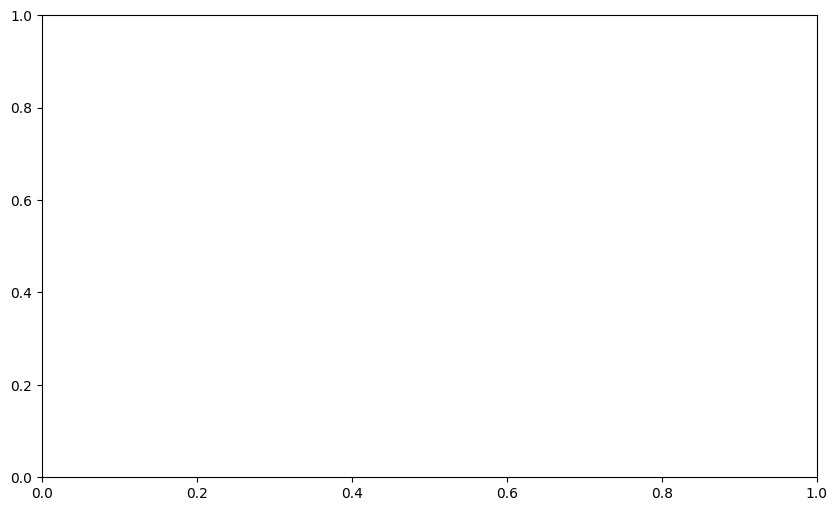

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

# Constants
nanoparticle_radius = 20  # nm
junction_distance = 5  # nm
timestep = 0.1  # seconds
velocity = 1  # nm/s
num_timesteps = 100  # Number of timesteps

# Residue properties (simplified Raman intensities for each amino acid)
amino_acids = {
    "A": np.array([0.2, 0.5, 0.8, 0.4, 0.1]),
    "C": np.array([0.1, 0.6, 0.7, 0.3, 0.2]),
    "D": np.array([0.3, 0.7, 0.9, 0.2, 0.4]),
    "E": np.array([0.2, 0.6, 0.7, 0.4, 0.3]),
    "F": np.array([0.4, 0.8, 1.0, 0.6, 0.5]),
}
spectral_wavelengths = np.linspace(400, 800, 5)  # Simplified spectrum range

# Generate a random protein sequence
protein_length = 50
protein_sequence = [random.choice(list(amino_acids.keys())) for _ in range(protein_length)]
residue_spacing = 0.38  # nm (approximate denatured protein spacing)

# Create a 2D EM field intensity map
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
intensity = np.exp(-((X / 5) ** 2 + (Y / 2) ** 2))  # Gaussian-like EM hotspot

# Simulate Raman spectra over time
composite_spectra = []
individual_spectra = {res: [] for res in protein_sequence}

time_points = np.arange(0, num_timesteps * timestep, timestep)
for t in range(num_timesteps):
    current_position = velocity * t  # Protein movement
    sampled_residues = []
    
    # Sample residues in the hotspot
    for i, residue in enumerate(protein_sequence):
        residue_x = -nanoparticle_radius + i * residue_spacing + current_position
        residue_y = 0  # Assume straight-line motion
        
        # Find intensity at this location
        distances = cdist([(residue_x, residue_y)], np.c_[X.ravel(), Y.ravel()])
        closest_idx = np.argmin(distances)
        intensity_factor = intensity.ravel()[closest_idx]
        
        # Scale Raman spectrum by intensity
        residue_spectrum = amino_acids[residue] * intensity_factor
        sampled_residues.append(residue_spectrum)
        
        individual_spectra[residue].append(np.sum(residue_spectrum))
    
    # Sum up all residue contributions
    composite_spectrum = np.sum(sampled_residues, axis=0)
    composite_spectra.append(composite_spectrum)
    
    

# Plot final composite spectrum
plt.figure(figsize=(8, 5))
for i, wavelength in enumerate(spectral_wavelengths):
    plt.plot(time_points, [s[i] for s in composite_spectra], label=f'{wavelength} nm')
plt.xlabel("Time (s)")
plt.ylabel("Raman Intensity")
plt.legend()
plt.title("Simulated SERS Raman Spectrum Over Time")
plt.show()

# Plot individual residue spectra
plt.figure(figsize=(10, 6))
for residue, spectrum in individual_spectra.items():
    plt.plot(time_points[:len(spectrum)], spectrum, label=f'Residue {residue}')
plt.xlabel("Time (s)")
plt.ylabel("Intensity")
plt.legend()
plt.title("Intensity of Individual Residues as They Pass Through the Hotspot")
plt.show()